## The simplest possible autoencoder for Fashion Mnist

In [1]:
# Importing tensorflow
import tensorflow as tf
# Importing some more libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
print('Done')

In [2]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [3]:
#A seperated endoder

encoder = keras.Model(input_img, encoded)

In [4]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

## Now train the model

In [5]:
from keras.datasets import mnist
import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

## Import dataset MNIST-Fashion dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 4s 8ms/step - loss: 0.4163 - val_loss: 0.3419
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3259 - val_loss: 0.3185
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3112 - val_loss: 0.3083
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3023 - val_loss: 0.3008
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2958 - val_loss: 0.2952
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2914 - val_loss: 0.2920
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2888 - val_loss: 0.2900
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2872 - val_loss: 0.2889
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2861 - val_loss: 0.2879
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2853 - val_loss: 0.2873

In [7]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

def compare(original, encoded, decoded, n=10):
  plt.figure(figsize=(20, 6))
  for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(original[i].reshape(28, 28),cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded pic
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(np.ones((32,32))*encoded[i], cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded[i].reshape(28, 28),cmap='binary')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()




313/313 [==============================] - 0s 1ms/step


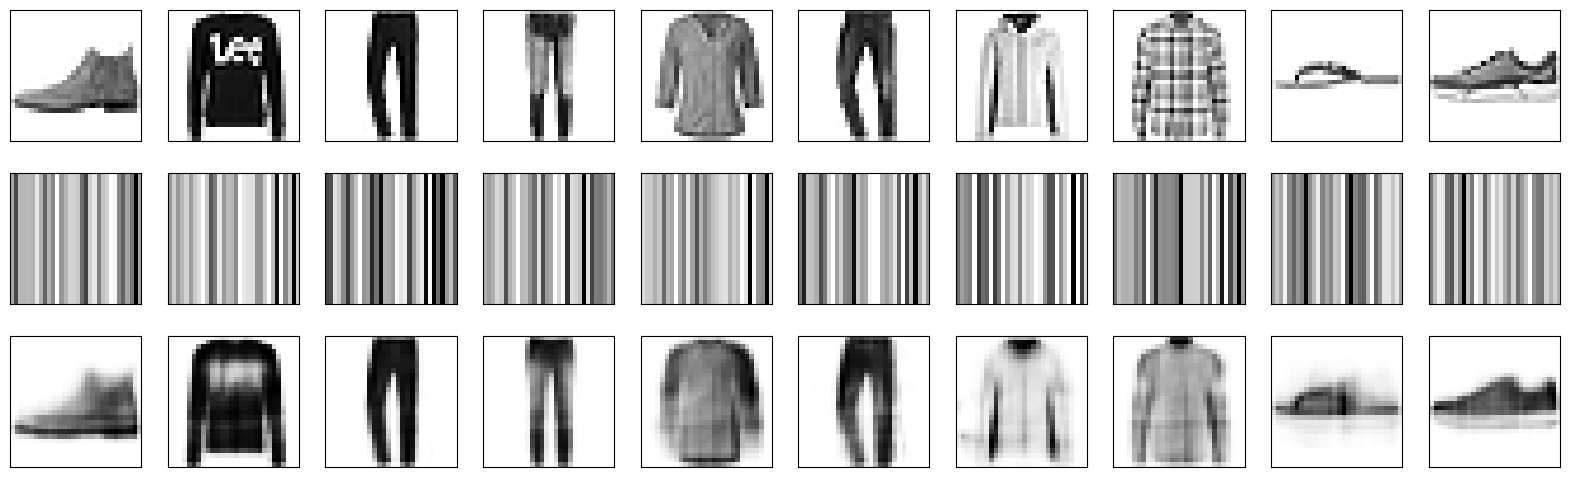

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
compare(x_test, encoded_imgs, decoded_imgs, 10)

Lets see if everything in the latent space makes sense. for the first three images the latent vector is modifies in different ways.

313/313 [==============================] - 0s 1ms/step


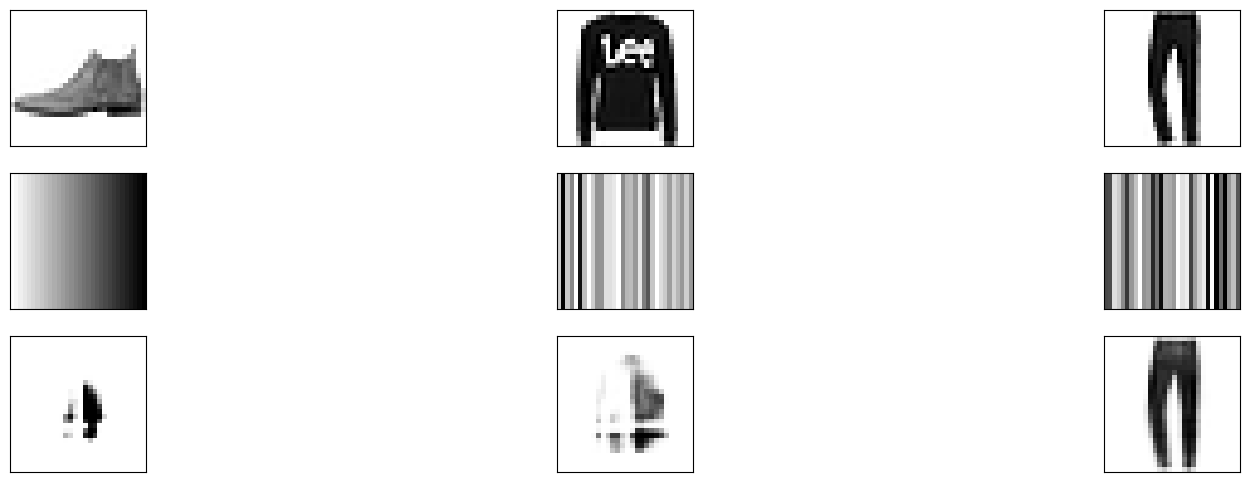

In [10]:
encoded_imgs = encoder.predict(x_test)

for i in range(32):
  encoded_imgs[0,i]=i+1   
for i in range(16):
  tmp=encoded_imgs[1,i];
  encoded_imgs[1,i]=encoded_imgs[1,31-i]
  encoded_imgs[1,31-i]=tmp
for i in range(32):
  encoded_imgs[2,i]=encoded_imgs[2,i]+0.5
decoded_imgs = decoder.predict(encoded_imgs)
compare(x_test, encoded_imgs, decoded_imgs, 3)

# Adding a sparsity constraint

In [11]:
from keras import regularizers
from keras import Sequential
from keras.layers import Dense

encoding_dim = 32

# Add a Dense layer with a L1 activity regularizer
encoder = Sequential([Dense(encoding_dim, 
                            activation='relu',
                            input_shape=(784,),
                            activity_regularizer=regularizers.l1(10e-5))])
decoder = Sequential([Dense(784, activation='sigmoid')])

autoencoder = Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.4247 - val_loss: 0.3517
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3359 - val_loss: 0.3265
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3178 - val_loss: 0.3147
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3087 - val_loss: 0.3075
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3031 - val_loss: 0.3029
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2993 - val_loss: 0.3000
Epoch 7/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2968 - val_loss: 0.2979
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.2951 - val_loss: 0.2965
Epoch 9/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2937 - val_loss: 0.2952
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2924 - val_loss: 0.2942

313/313 [==============================] - 0s 1ms/step


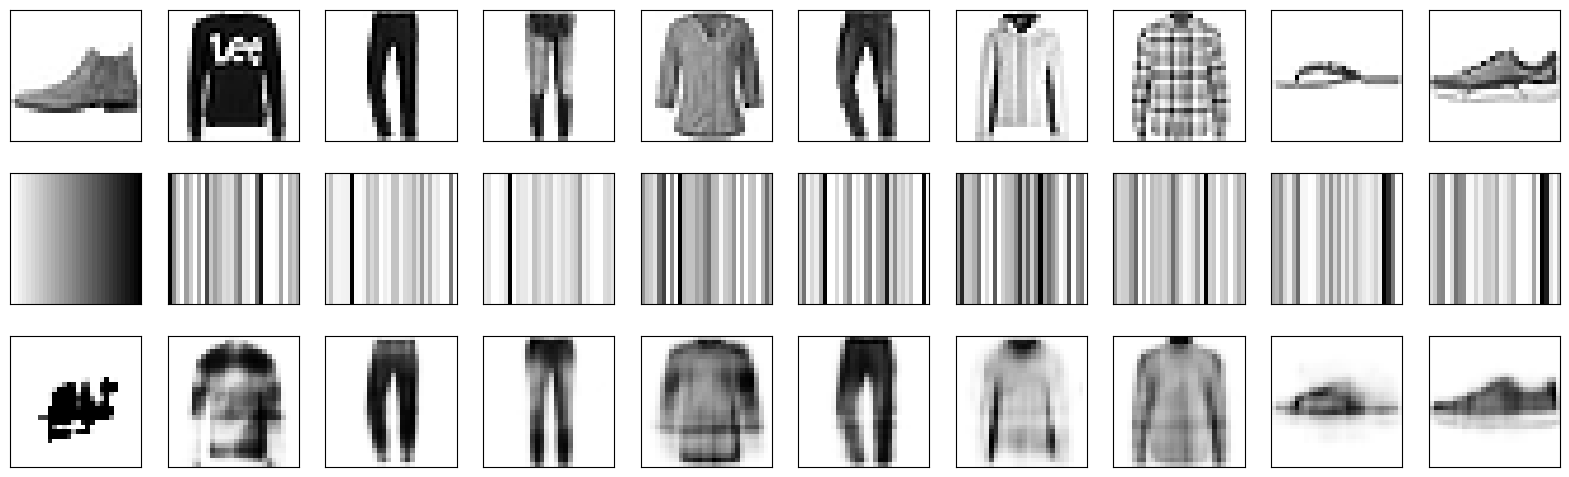

In [12]:
encoded_imgs = encoder.predict(x_test)
for i in range(32):
  encoded_imgs[0,i]=i+1  
for i in range(16):
  tmp=encoded_imgs[1,i];
  encoded_imgs[1,i]=encoded_imgs[1,31-i]
  encoded_imgs[1,31-i]=tmp
for i in range(32):
  encoded_imgs[2,i]=encoded_imgs[2,i]+0.5
decoded_imgs = decoder.predict(encoded_imgs)
compare(x_test, encoded_imgs, decoded_imgs, 10)